Ousmane CISSE - KOBANA Johan - DE MYTTANERE Thomas 

MIPI 23-5B 

# CODE - ARE DYNAMIC - JOTARE
 Le code qui suit n'est pas fonctionnel mais formel. Il permet de VISUALISER une modélisation très simple de la propagation et les effets d'un gene dans une population. 
 
On définira d'abord les conditions initiales de notre population, de notre gène et de ses effets. Celles-ci seront peu complexes pour simplifier la compréhension.

Puis, vous pourrez voir comment évolue cette population et ce gène, d'après les conditions initiales, au fil du temps.

La modélisation n'est pas automatique : l'état de la population n'a pas évolué de manière automatique avec des fonctions mais j'ai entré manuellement les valeurs, en ayant calculé au préalable l'évolution de la grille. Voila pourquoi les conditions initiales sont plutôt simples ici. 

# Introduction

In [321]:
import matplotlib.pyplot as plt
import numpy as np

largeur = 10
hauteur = 3

In [322]:
def generate_grille(larg,haut):
    """
    Creer la grille de la largeur de hauteur
    """
    B = np.zeros((haut,larg))
    for n in range(larg):
        for m in range(haut):
            B[m,n]=0
    return B

generate_grille(largeur,hauteur)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

=========================================================
# Conditions initiales de la modélisation :

- On suppose que dans cette espece, c'est entre les 20 et 40 ans de la vie que l'on se reproduit.
- population initiale = 30 ans
- esperance  = 80 ans maximum pour tout le monde (individus de plus de 80 ans meurent automatiquement)
- Il ne peut y avoir que 4 générations qui vivent simultanément.
- fert = 2
    - Chaque individu d'une population se reproduit avec la même personne (de sa même génération) 2 fois.Chaque couple engendre donc deux enfants. La population double donc.  
- gene = 6 
    - Le gène se transmet si un seul parent l'a, quelque soit le nombre d'allèles. DONC, il y aura entre (gene/2) et (gene*2) individus EN PLUS qui auront le gène à la fin de CHAQUE ETAPE
    - Le gène a 2 conséquences
        - un individu porteur vie sa pleine espérance de vie et ne meurt pas prématurément.
        - un individu porteur s'accouple en priorité avec un individu non-porteur.

### On va ici découper la vie en 4 étapes :
- age entre 0 et 20 ans : 
    - pas de reproduction
    - <4% des individus de la génération meurent (sur 20 ans)
- age entre 20 et 40 ans : 
    - seul zone de reproduction : x2 de la population
    - <2% des individus de la génération meurent (sur 20 ans)
- age entre 40 et 60 ans : 
    - pas de reproduction
    - <12% des individus de la génération meurent
- age entre 60 jusqu'à 80 ans: 
    - pas de reproduction
    - 50% de la génération meurent 
- individus de plus de 80 ans meurent

# 0 vie passée (temps =0). 
- 1 population de 30 personnes dont une part a le gene (1/5)

- Une génération fait a chaque fois trois lignes dans la modélisation.

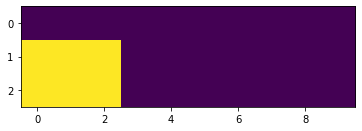

In [332]:
largeur = 10
hauteur = 3
grille= generate_grille(largeur,hauteur)
grille[1,1]=1

#porteur de gènes
for e in range(int(largeur/3)):
    grille[1,e]=2
    grille[2,e]=2
    
plt.imshow(grille)

- genes : jaune
- normal : violet

# 1/4 de vie (20 ans): 
## attention petit changement de couleur

- Naissance = +0 
- Mort = -1 (jaune) : 4% de la population donc un enfant meurt prématurément
- Taille population : 29
- Nombre porteurs du gène = 6 (bleu) 
- Proportion = 20% (=6/29)

<function matplotlib.pyplot.show(close=None, block=None)>

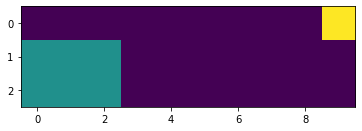

In [333]:
largeur = 10
hauteur = 3
grille= generate_grille(largeur,hauteur)

#naissance : RIEN 

# les morts de la génération 1
grille[0,largeur-1]=2

# porteurs du gene (generation 1)
for e in range(int(largeur/3)):
    grille[1,e]=1
    grille[2,e]=1
    


plt.imshow(grille)
plt.show

# 2/4 de vie (40 ans)

- Naissance = +30 
- Mort = -2 (jaune) : un en moins dans chaque génération
- Taille population : 57
- Nombre porteurs du gène = 18 (bleu : +12 avec les naissances) 
    - ca veut dire qu'ici les porteurs de la G1 se sont TOUS reproduit avec un non-porteur et chaque couple a eu 2 enfants porteurs, ce qui double le nombre de porteurs dans la G2
- Proportion = 31.5%

<function matplotlib.pyplot.show(close=None, block=None)>

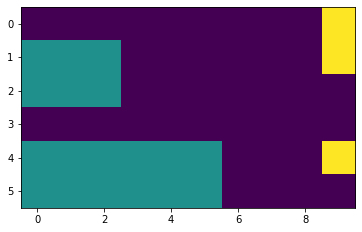

In [334]:
#NAISSANCES
largeur = 10
hauteur = 3
hauteur*=2
grille= generate_grille(largeur,hauteur)

for e in range(largeur):
    grille[hauteur-1,e]=0
    grille[hauteur-2,e]=0
    
# LES MORTS
#génération1
grille[0,largeur-1]=2
grille[1,largeur-1]=2

#generation2
grille[4,largeur-1]=2

# porteurs du gene (generation 1)
for g1 in range(int(largeur/3)):
    grille[1,g1]=1
    grille[2,g1]=1

# porteurs du gene (generation 2)
for g2 in range(6):
    grille[4,g2]=1
    grille[5,g2]=1

#affichage
plt.imshow(grille)
plt.show

# 3/4 de vie (60 ans)

- Naissance = +30 
- Mort = -5 (jaune) : -3 pour la G1, -1 pour la G2, -1 pour la G3
- Taille population : 82
- Nombre porteurs du gène = 42 (vert : +24 avec les naissances) 
    - ca veut dire qu'ici les porteurs de la G2 se sont reproduits avec tout le monde (et les non-porteurs inclus) et maintenant la G3 ne contient que des porteurs du gène
- Proportion = 51.2%

<function matplotlib.pyplot.show(close=None, block=None)>

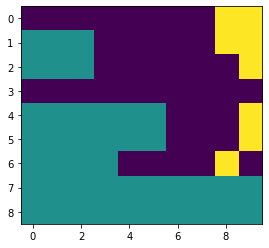

In [335]:
#NAISSANCES
largeur = 10
hauteur = 3
hauteur*=3
grille= generate_grille(largeur,hauteur)

for e in range(largeur):
    grille[hauteur-1,e]=0
    grille[hauteur-2,e]=0
    
# LES MORTS
#génération 1 :
grille[0,largeur-1]=2
grille[0,largeur-2]=2
grille[1,largeur-1]=2
grille[1,largeur-2]=2
grille[2,largeur-1]=2

#génération 2 :
grille[4,largeur-1]=2
grille[5,largeur-1]=2

#génération 3 :
grille[6,largeur-2]=2
# PORTEURS DU GENE (GENERATION 1)
for g1 in range(int(largeur/3)):
    grille[1,g1]=1
    grille[2,g1]=1

# PORTEURS DU GENE (GENERATION 2)
for g2 in range(6):
    grille[4,g2]=1
    grille[5,g2]=1
    
# PORTEURS DU GENE (GENERATION 3) : 
for g3 in range(largeur):
    grille[7,g3]=1
    grille[8,g3]=1
for g3 in range(4):
    grille[6,g3]=1
#AFFICHAGE : 
plt.imshow(grille)
plt.show

# 1 vie (80 ans)

- Naissance = +30 
- Mort = -5 (jaune) : -13 pour la G1, -3 pour la G2, 0 pour la G4 !
- Taille population : 93
- Nombre porteurs du gène = 70 (vert : +30 avec les naissances) 
    - ca veut dire qu'ici les porteurs de la G2 se sont reproduits avec tout le monde (et les non-porteurs inclus) et maintenant la G3 ne contient que des porteurs du gène
- Proportion = 75%

<function matplotlib.pyplot.show(close=None, block=None)>

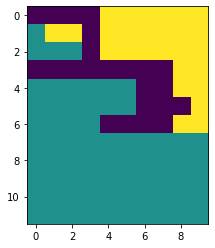

In [336]:
#NAISSANCES
largeur = 10
hauteur = 3
hauteur*=4
grille= generate_grille(largeur,hauteur)

for e in range(largeur):
    grille[hauteur-1,e]=0
    grille[hauteur-2,e]=0
    
# LES MORTS
#génération 1 :
for m1 in range(4,largeur):
    grille[0,m1]=2
    grille[1,m1]=2
    grille[2,m1]=2

#génération 2 :
grille[3,largeur-1]=2
grille[3,largeur-2]=2
grille[4,largeur-1]=2
grille[4,largeur-2]=2
grille[5,largeur-1]=2

#génération 3 :
grille[6,largeur-2]=2
grille[6,largeur-1]=2

# PORTEURS DU GENE (GENERATION 1)
for g1 in range(int(largeur/3)):
    grille[1,g1]=1
    grille[2,g1]=1
    
for g1 in range(1,2):
    grille[g1,1]=2
    grille[g1,2]=2

    
# PORTEURS DU GENE (GENERATION 2)
for g2 in range(6):
    grille[4,g2]=1
    grille[5,g2]=1
    
# PORTEURS DU GENE (GENERATION 3) : 
for g3 in range(largeur):
    grille[7,g3]=1
    grille[8,g3]=1
for g3 in range(4):
    grille[6,g3]=1
    
#PORTEURS DU GENE (GENERATION 4) :
for g3 in range(largeur):
    grille[9,g3]=1
    grille[10,g3]=1
    grille[11,g3]=1
    
#AFFICHAGE : 
plt.imshow(grille)
plt.show

# Bilan au bout de 80 ans (une vie):

## génération 1 :

- Elle a maintenant entre 60 et 80 ans.
- 60% sont morts déja.
- Il reste 10 survivants.
    - 4 d'entre eux sont porteurs du gène: ils ont moins de 80 ans et mourront à EXACTEMENT 80 ans.
    - 6 d'entre eux ne sont pas porteurs du gène et mourront à 80 ans ou avant.
- 40% portent le gène

## génération 2 : 
- elle a maintenant entre 40 et 60 ans.
- 20% sont morts soit 5 personnes.
- Il reste 25 survivants
    - 12 d'entre eux sont porteurs du gène et mourront à EXACTEMENT 80 ans.
    - 13 d'entre ne sont pas porteurs du gène et mourront à 80 ans ou avant.
    
- Prèsque 50% portent le gène

## génération 3:
- elle a entre 20 et 40 ans 
- dans les 20 dernieres années, elle a concu la génération 1 (qu'on verra juste après)
- 2 sont morts soit moins de 7%.
- Il reste 28 survivants
    - 24 d'entre eux sont porteurs du gène et mourront à EXACTEMENT 80 ans.
    - 4 d'entre ne sont pas porteurs du gène et mourront à 80 ans ou avant.
- Près de 86% portent le gène.

## génération 4 :

- elle a entre 0 et 20 ans 
- Aucun ne sont morts : 
    - toute cette génération est immunisé par le gène contre la mort prématurée
- 100% portent le gène.

 # Ce qui va se passer ensuite :
 
 Maintenant la suite est automatique : 
 - les générations 1, 2 et 3 vont mourir au fil du temps. Les tous derniers individus à vivre seront ceux qui porte le gène et quelques non-porteurs chanceux (il y en aura de moins en moins d'ailleurs).
 - la génération 4 va maintenant engendrer une génération qui, comme elle, porte à 100% le gène. 
 - Dans ces conditions, toutes les générations de 4 à +infini ne mourront jamais prématurément. Ce gène semble avantageux pour notre population.

# Legere modification : 
- Maintenant, si on redéfinit une caractéristique du gène comme suit ; 
    - Le gène a 2 conséquences
        - un individu porteur vie sa pleine espérance de vie et ne meurt pas prématurément.
        - un individu porteur s'accouple SEULEMENT avec un individu non-porteur.

De, la il va se passer une chose particulière :
- à partir de la génération 4, les individus ne peuvent plus se reproduire car il n'y a que des individus porteurs et que ceux-ci ne peuvent pas se reproduire entre eux. AINSI, la population va s'éteindre dès la génération 4 (qui vivra jusqu'à EXACTEMENT 80 ans et mourra sans laisser de descendance).

# Paramètres à préparer pour créer des fonctions modélisantes: 
- taille de la population à l'origine
- nombre de porteurs à l'origine
- esperance de vie fixe et générale
- l'esperance de vie aléatoire entre 0 et 100 ans : esp (pour chaque individu et qui s'approche généralement mais pas toujours de l'esperance générale)


- conditions de reproduction :
    - fécondité (entre 0 et 5) : nombre d'enfants possible
    - possibilité d'une reproduction inter générations? 
    - age de reproduction


- Effets du gène sur : 
    - la fécondité du porteur  (ne fait rien, augmente, diminue ou fixe à une valeur précise) 
    - l'esperance de vie du porteur (ne fait rien, augmente, diminue ou fixe à une valeur précise) 

 # Fonctions  :

- Une fonction (ou une classe) qui définit un individu normal avec : 
    - esp au hasard qui est entre 0 et 100 ans (int)
    - fecondité fixe entre 1 et 5 (int)
    - son sexe au hasard (str ou int)
    - un age qui évolue au fil du temps (et qui vaut 0 à la naissance)


- Une fonction (ou une classe) qui définit un individu porteur avec les caractéristiques influencés par le gène: 
    - esp au hasard qui est entre 0 et 100 ans (int)
    - fecondité fixe entre 1 et 5 (int) et qui peut dépendre du partenaire (porteur ou non)
    - son sexe au hasard (str ou int)
    - un age qui évolue au fil du temps (et qui vaut 0 à la naissance)


- Une fonction (fecondation) qui accouple 2 individus :
    - Elle prend en compte la fécondité des 2 individus pour créer un certains nombre d'enfants
    - Elle prend en compte la génétique des 2 individus pour la génétique de l'enfant
    - Elle crée un (ou plusieurs) individu(s) grâce à l'une des 2 fonctions si dessus


- Une fonction qui crée la génération 0 avec les individus NORMAUX et les individus PORTEURS  : 
    - crée une population d'individus (liste de liste)
    - à partir des 2 premieres fonctions (pour creer les individus)
    - à partir de la taille de la population à l'origine
    - à partir de nombre de porteurs à l'origine


- Une fonction (naissance) qui crée la génération naissante (engendrée par la gen. précédente) :
    - crée une population d'individus (liste de liste) 
    - si les individus (de même age) de la génération précédente sont dans l'age de reproduction et que leur fécondité le permet, la fonction cree une population d'individus en accouplant deux individus de la generation precedente (fonction fecondation)
    
    
- Une fonction (génération) (G) qui actualise une génération (G-1) pour l'emmener à l'étape suivante (G):
    - actualise l'age de tous les individus de la génération
    - accouple, si possible, les individus de même age (avec la fonction naissance) 
    - tue les individus dont l'age atteint l'esperance de vie
    
    - retiens les donnéees de la génération : 
        - taille de la population
        - morts
        - nbre porteurs du gène vivants
        - nbre porteurs du gène morts
        - proportions
    - Il y aura donc entre 3 et 5 fonction générations


- Une fonction qui fait tourner les fonctions générations au fil du temps jusqu'à la fin de la modélisation


- Une fonction qui affiche la modélisation au fil du temps 